In [ ]:
#################################################
####           DEPENDENCIES-LOADING          ####
#################################################

In [ ]:
# Downloading the project folders from drive to local
!pip install --upgrade --no-cache-dir gdown
!gdown 1rEp-jVRP43eHlhavFQ-UoEHqoUxV-VWp
!unzip SCG.zip
!rm SCG.zip

In [ ]:
# Changing the directory
%cd SCG

In [ ]:
# Installing all the dependencies
!pip3 install -r requirements.txt

In [ ]:
TSNE_len = 3000

In [ ]:
#################################################
####               AUTO-ENCODER              ####
#################################################

In [ ]:
# For training autoencoders
!python autoencoder/train.py

In [ ]:
######################################################
####                   TSNE PLOT                  ####
######################################################

(20, 3)
113/113 [==============================] - 9s 6ms/step
(20, 3)


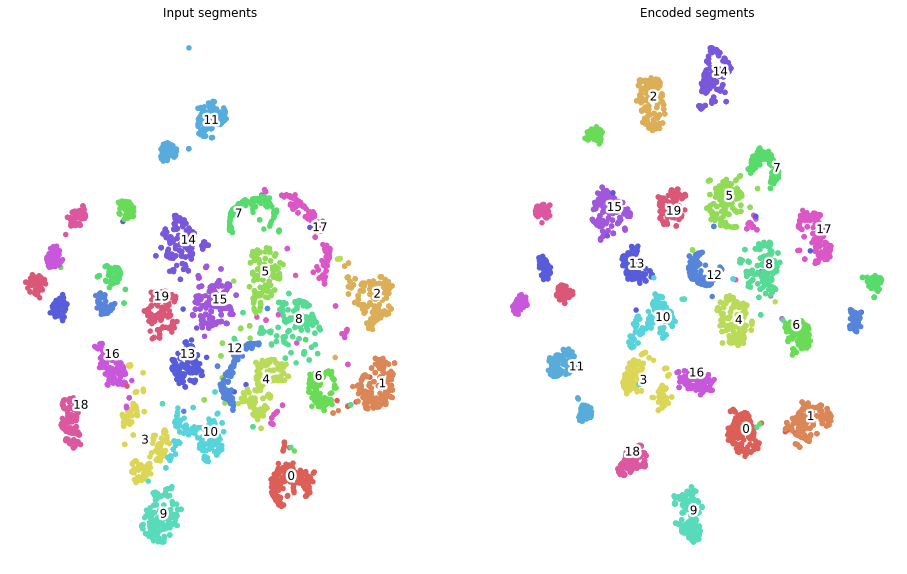

In [ ]:
# For TSNE plot
import pandas as pd
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
from scipy.signal import spectrogram

mod_path = '/content/SCG/saved/autoencoder/093.hdf5'
def feature_extraction(model_path, output_layer, signals):
    import tensorflow_addons as tfa
    tfa.losses.TripletSemiHardLoss()

    dependencies = {'loss': tfa.losses.TripletSemiHardLoss()}
    model = tf.keras.models.load_model(model_path, custom_objects=dependencies)
    if not output_layer == "sequential":
        out = model.get_layer(output_layer).output
        model = tf.keras.Model(model.input, out)

    data_preproc = np.array([e for e in signals]).astype(float)
    features = model.predict(data_preproc)
    return features

def load_signal(record):
    signal = pd.read_csv(record, header=None)
    signal = signal.to_numpy()
 
    signal1 = np.asarray(signal)
    signal1 = signal1.reshape(TSNE_len)
    
    # signal = np.expand_dims(signal, axis=-1)  # Create feature dimension
    return signal, signal1


sig = []
inp = []
tar = []

file_path = 'datasets/scg'
for i in os.listdir(file_path):
    if i == 'preproc_csv' or i == 'start_points.json':
        continue

    for j in os.listdir(file_path+'/'+i):
        for k in os.listdir(file_path+'/'+i+'/'+j):
            a,b = load_signal(file_path+'/'+i+'/'+j+'/'+k)
            sig.append(a)
            inp.append(b)
            tar.append(i)


# Utility function to visualize the outputs of t-SNE
plt.figure(figsize=(16, 10))

def fashion_scatter(x, colors, texts, plot):
    colors = np.asarray(colors)
    num_classes = len(np.unique(colors))
    classes = np.unique(colors)
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette.shape)
    ax = plt.subplot(1,2,plot, aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=30, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    z = {}
    for i in range(len(colors)):
        if int(colors[i]) not in z:
            z[int(colors[i])] = []
        z[int(colors[i])].append([x[i][0],x[i][1]])

    for i in range(num_classes):
        xy = np.median(np.dstack(z[i]), -1)
        txt = ax.text(xy[0][0], xy[0][1], str(i), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    plt.axis('off')
    plt.title(texts)

fashion_tsne_inp = TSNE(random_state=1).fit_transform(inp)
fashion_scatter(fashion_tsne_inp, tar, "Input segments", 1)

X = feature_extraction(mod_path, 'flatten', sig)
fashion_tsne_X = TSNE(random_state=1).fit_transform(X)
fashion_scatter(fashion_tsne_X, tar, "Encoded segments", 2)

In [ ]:
#################################################
####               VERIFICATION              ####
#################################################

In [ ]:
# For training Siamese network
!python verification/train.py

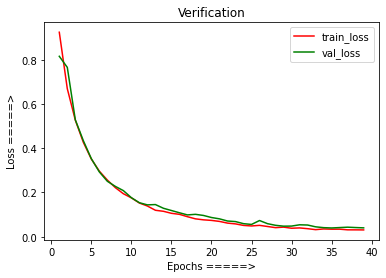

In [ ]:
# For plotting loss curves
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv('/content/SCG/saved/verification/train_loss_metric.csv')
temp = temp.to_numpy()
plt.title("Verification")
plt.plot(temp[:, 0], temp[:, 1], color='r', label='train_loss')
plt.plot(temp[:, 0], temp[:, 2], color='g', label='val_loss')
plt.title("Verification")
plt.xlabel('Epochs =====>')
plt.ylabel('Loss =====>')
plt.legend()
plt.show()

In [ ]:
!python verification/predict.py --model_path="/content/SCG/saved/verification/035.hdf5"

2023-02-19 13:24:41.285035: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 13:24:41.285182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 13:24:41.285203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Loading testing set...
100% 720/720 [00:01<00:00, 430.06it/s]
Missing data:  0
2023-02-19 13:24:46.292212: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42

In [ ]:
#################################################
####              IDENTIFICATION             ####
#################################################

In [ ]:
# For training Siamese identification network
!python identification/train.py

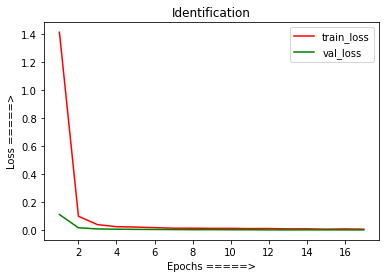

In [ ]:
# For plotting loss curves
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv('/content/SCG/saved/identification/train_loss_metric.csv')
temp = temp.to_numpy()

plt.plot(temp[:, 0], temp[:, 1], color='r', label='train_loss')
plt.plot(temp[:, 0], temp[:, 2], color='g', label='val_loss')
plt.title("Identification")
plt.xlabel('Epochs =====>')
plt.ylabel('Loss =====>')
plt.legend()
plt.show()

In [ ]:
!python identification/predict.py --model_path="/content/SCG/saved/identification/016.hdf5"

2023-02-19 13:25:45.619235: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 13:25:45.619360: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 13:25:45.619385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Loading testing set...
100% 720/720 [00:01<00:00, 590.44it/s]
Missing data:  0
2023-02-19 13:25:49.964152: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42